# TOC: 

1. Overview of tensorflow datasets (TFDS) library

2. Intro to TFDS library.

3. Visualization methods of TFDS.

4. Multiple ways to split data into train, test and validation sets.

## Overview

What is TFDS? -- TFDS is a set of ready to use datasets for various different learning tasks, including:

- Computer vison datasets

- Natural language processing datasets

- Miscellaneous other datasets for perforing Usupervised Learning, Reinforcement learning, and more.

The entire list of available datasets can be found [here](https://www.tensorflow.org/datasets/catalog/overview). Be aware that these datasets are from HEAD (*e.g.* the most recent dev version of Tensorflow). 

All of these datasets are exposed under the `tensorflow.data.Datasets` module.

In [10]:
import tensorflow as tf
# !pip install tfds
import tensorflow_datasets as tfds

import numpy as np

In [11]:

# First argument to 'load' is name of dataset.
# param' split' controls which split we wish to load (e.g. train, test or validation) 
# param 'shuffle_files' controls wether or not data is shuffled between each epoch
# param 'data_dir' controls where the dataset is saved (defaults to ~/tensorflow_datasets/)
# param 'with_info' controls wether or not the metadata for the dataset is included
# param 'as_supervised' controls wether or not an (features, label) tuple is returned (as opposed to just features).
# param 'download' controls wether or not the library will attempt to download the dataset.


# Here, we will download and load the  training split of the mnist dataset with info:
(training_data, test_data), info = tfds.load('mnist', with_info=True, shuffle_files=True, as_supervised=True, split=['train', 'test'])

In [3]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [4]:
# To iterate over the dataset in batches:
batch_size = 32

for epoch in range(2):
    print(f'epoch {epoch}')
    for img, label in training_data.batch(batch_size):
        # notice that img.shape[0] == batch_size
        print(f'img: {img.shape}, labels: {label}') 
        # train model
        pass


epoch 0
img: (32, 28, 28, 1), labels: [7 0 8 1 8 8 3 7 9 1 7 7 9 4 3 4 2 0 9 6 6 5 4 7 1 7 8 0 6 7 6 3]
img: (32, 28, 28, 1), labels: [6 0 5 9 0 2 2 9 4 5 7 7 4 3 3 3 4 3 6 9 1 7 9 4 6 4 7 7 0 6 1 7]
img: (32, 28, 28, 1), labels: [3 4 3 8 1 1 9 1 0 3 7 0 9 0 6 8 5 1 1 9 6 4 9 3 8 2 8 9 2 3 7 3]
img: (32, 28, 28, 1), labels: [1 3 5 5 7 9 3 3 9 2 9 6 0 7 1 6 6 4 2 8 9 1 7 3 0 1 3 4 7 9 0 9]
img: (32, 28, 28, 1), labels: [5 1 9 5 2 6 7 2 2 0 5 7 4 7 3 3 1 7 2 3 0 2 9 2 9 4 4 7 9 9 7 8]
img: (32, 28, 28, 1), labels: [0 0 5 1 4 0 9 8 3 9 6 9 2 3 3 9 7 8 2 5 7 9 4 2 4 6 9 4 1 7 9 3]
img: (32, 28, 28, 1), labels: [4 7 2 1 5 3 0 8 7 1 5 4 1 3 6 0 3 6 6 0 8 4 6 0 3 8 4 5 9 5 6 2]
img: (32, 28, 28, 1), labels: [8 9 5 0 6 0 3 7 4 7 7 7 3 6 7 8 7 8 8 1 6 8 1 2 6 0 9 6 5 6 4 3]
img: (32, 28, 28, 1), labels: [7 6 6 6 2 0 2 3 2 0 8 5 6 6 7 6 2 6 7 4 7 3 4 0 2 2 5 8 6 8 1 3]
img: (32, 28, 28, 1), labels: [1 5 5 8 6 9 4 1 3 9 5 7 5 1 5 5 9 3 8 0 1 0 2 8 6 3 3 4 9 6 5 8]
img: (32, 28, 28, 1), labels: [1

img: (32, 28, 28, 1), labels: [4 6 7 8 7 3 1 9 1 5 2 6 1 6 2 2 8 9 0 1 9 5 9 5 4 1 7 5 0 3 6 3]
img: (32, 28, 28, 1), labels: [4 5 1 3 0 7 4 1 5 4 9 2 9 4 1 9 6 0 8 2 5 8 7 9 3 0 1 7 3 4 8 1]
img: (32, 28, 28, 1), labels: [0 4 6 6 8 2 0 3 3 9 3 0 0 3 9 1 5 7 0 2 8 3 1 4 0 4 1 4 8 8 0 1]
img: (32, 28, 28, 1), labels: [6 8 5 2 2 2 5 8 0 4 5 8 4 4 4 0 1 5 2 1 1 8 3 7 7 4 5 3 2 3 5 0]
img: (32, 28, 28, 1), labels: [4 7 0 0 7 3 6 0 2 4 2 7 1 9 2 4 0 3 8 9 2 1 3 3 7 8 5 1 4 0 9 0]
img: (32, 28, 28, 1), labels: [8 9 9 6 9 2 9 3 9 1 0 8 1 0 3 5 0 1 1 1 2 6 3 1 4 1 8 7 7 2 3 8]
img: (32, 28, 28, 1), labels: [1 8 6 7 5 2 9 2 9 4 0 5 2 8 3 4 8 1 6 8 9 3 3 6 3 5 2 5 5 4 7 6]
img: (32, 28, 28, 1), labels: [0 6 4 2 6 5 1 4 6 8 6 2 4 7 3 7 8 9 8 0 0 3 2 7 2 2 7 2 7 0 4 6]
img: (32, 28, 28, 1), labels: [9 8 7 6 1 1 1 3 7 5 3 6 3 6 3 5 4 8 3 8 9 5 6 7 5 2 3 5 2 9 1 8]
img: (32, 28, 28, 1), labels: [8 7 4 2 6 9 5 2 7 8 8 5 1 2 2 3 5 5 4 6 6 3 2 1 4 4 0 6 8 3 4 2]
img: (32, 28, 28, 1), labels: [6 7 4 9 8

img: (32, 28, 28, 1), labels: [3 3 8 8 1 0 6 9 4 2 4 3 8 7 5 1 8 8 7 7 2 7 7 9 9 7 3 0 2 8 2 6]
img: (32, 28, 28, 1), labels: [5 6 3 0 0 9 7 9 3 1 5 6 1 7 8 9 1 8 3 5 6 3 5 5 3 3 1 4 4 8 6 9]
img: (32, 28, 28, 1), labels: [9 4 0 3 5 7 5 4 9 9 8 1 9 4 7 5 8 6 1 5 0 4 6 7 3 0 5 7 0 6 2 3]
img: (32, 28, 28, 1), labels: [5 4 8 5 1 4 5 6 6 8 8 3 5 7 1 8 4 7 7 1 3 1 3 0 0 8 5 5 6 4 8 7]
img: (32, 28, 28, 1), labels: [3 2 2 7 7 4 0 9 4 4 6 2 4 3 8 1 9 1 3 8 5 8 8 3 2 7 9 1 7 8 2 5]
img: (32, 28, 28, 1), labels: [1 6 4 5 3 5 0 2 1 2 0 8 2 6 6 5 7 2 4 2 9 7 5 9 6 4 8 0 1 1 1 4]
img: (32, 28, 28, 1), labels: [7 0 6 2 4 9 9 9 4 7 2 9 5 2 6 5 1 4 8 8 5 2 2 8 5 8 4 2 4 8 5 7]
img: (32, 28, 28, 1), labels: [9 0 4 5 5 1 2 2 4 2 2 1 9 4 6 2 9 1 7 8 5 6 8 2 6 0 9 8 8 0 0 5]
img: (32, 28, 28, 1), labels: [8 2 7 2 5 3 7 2 2 2 3 3 8 8 7 3 9 7 5 8 2 2 1 9 9 4 9 5 2 6 4 9]
img: (32, 28, 28, 1), labels: [8 1 4 4 5 1 1 3 5 7 2 3 3 9 2 7 7 5 6 4 4 7 2 7 7 9 9 7 5 4 0 9]
img: (32, 28, 28, 1), labels: [1 8 4 8 5

img: (32, 28, 28, 1), labels: [5 4 9 4 8 6 2 6 3 2 8 6 3 0 2 0 7 8 0 6 6 5 2 8 6 6 2 9 8 5 1 6]
img: (32, 28, 28, 1), labels: [4 1 6 1 4 7 6 9 5 3 3 1 6 9 5 3 6 6 3 5 8 2 2 5 8 8 7 1 9 6 3 4]
img: (32, 28, 28, 1), labels: [4 5 9 7 7 3 7 1 5 9 9 2 8 2 3 0 3 1 7 4 8 2 0 1 7 3 6 1 5 0 5 8]
img: (32, 28, 28, 1), labels: [1 0 0 1 2 2 0 6 2 5 5 0 6 1 1 9 3 6 0 2 5 2 1 9 0 7 2 9 2 1 7 2]
img: (32, 28, 28, 1), labels: [8 5 3 4 3 9 5 6 6 6 4 9 6 2 1 3 9 0 7 7 1 4 1 5 9 8 2 6 2 9 5 0]
img: (32, 28, 28, 1), labels: [2 5 8 2 8 1 4 1 5 5 2 7 6 8 3 8 1 5 6 6 5 4 2 0 7 6 9 1 5 0 3 2]
img: (32, 28, 28, 1), labels: [0 7 2 5 1 2 9 8 8 8 2 5 5 0 8 1 2 6 5 5 1 5 8 4 6 4 0 3 6 9 1 6]
img: (32, 28, 28, 1), labels: [3 2 1 8 4 0 2 2 6 6 4 2 8 9 1 0 9 1 8 5 3 3 0 1 6 7 2 8 1 7 1 9]
img: (32, 28, 28, 1), labels: [4 0 0 3 9 0 1 8 1 3 2 5 5 9 0 2 6 6 8 1 7 0 9 3 7 2 1 9 5 5 3 0]
img: (32, 28, 28, 1), labels: [7 8 6 9 6 5 1 1 7 3 5 1 2 3 7 9 4 5 2 4 4 9 7 2 3 1 7 9 5 9 9 6]
img: (32, 28, 28, 1), labels: [4 9 4 0 3

img: (32, 28, 28, 1), labels: [2 4 0 0 7 4 1 7 0 6 5 5 2 1 1 4 7 6 0 9 5 2 2 4 9 7 5 1 7 0 0 3]
img: (32, 28, 28, 1), labels: [1 8 7 8 7 6 6 5 5 7 7 1 9 4 0 8 7 5 8 7 2 7 7 4 0 9 1 6 0 5 2 9]
img: (32, 28, 28, 1), labels: [7 9 1 4 3 3 8 3 4 7 5 5 3 0 1 9 4 2 8 6 5 6 9 2 9 1 8 6 7 6 7 4]
img: (32, 28, 28, 1), labels: [8 3 9 3 3 5 7 6 6 1 8 4 9 9 7 0 7 0 6 8 5 6 5 6 9 6 9 5 0 4 3 6]
img: (32, 28, 28, 1), labels: [0 6 1 3 4 9 6 4 5 2 0 2 7 8 0 1 0 7 0 2 7 0 4 8 1 6 0 1 2 0 1 2]
img: (32, 28, 28, 1), labels: [3 2 9 1 0 8 2 8 0 8 5 3 6 1 4 7 1 9 6 3 4 3 8 9 1 6 0 3 6 8 1 5]
img: (32, 28, 28, 1), labels: [6 3 3 0 9 9 7 5 2 2 3 1 4 7 1 5 2 1 8 8 2 5 5 1 0 1 0 6 8 7 1 4]
img: (32, 28, 28, 1), labels: [4 8 8 7 1 7 0 2 1 7 8 4 7 2 0 3 2 1 5 0 6 5 3 7 7 1 2 7 7 6 7 6]
img: (32, 28, 28, 1), labels: [7 1 5 3 1 4 0 4 2 6 1 4 9 9 3 1 6 7 7 5 5 1 7 7 4 6 4 2 0 4 8 8]
img: (32, 28, 28, 1), labels: [6 3 5 8 6 0 1 0 1 8 3 7 2 9 2 3 3 9 1 0 3 6 9 6 9 3 5 9 8 0 1 3]
img: (32, 28, 28, 1), labels: [7 3 7 3 5

img: (32, 28, 28, 1), labels: [6 0 8 5 1 2 0 9 0 2 9 0 4 2 4 9 4 9 2 5 9 2 2 6 8 8 5 4 3 3 8 0]
img: (32, 28, 28, 1), labels: [2 0 5 0 9 5 0 0 7 7 9 8 9 0 6 5 2 6 7 4 6 9 3 3 5 3 6 8 4 3 7 3]
img: (32, 28, 28, 1), labels: [2 8 8 4 1 9 4 6 4 7 7 2 2 5 6 4 1 6 9 8 4 7 1 5 3 2 7 5 5 6 2 9]
img: (32, 28, 28, 1), labels: [6 6 3 0 7 6 5 7 0 6 8 0 8 6 5 8 0 6 1 3 8 7 9 5 8 6 9 9 2 7 8 2]
img: (32, 28, 28, 1), labels: [5 8 4 2 1 7 0 6 1 3 8 4 5 3 5 3 0 1 0 4 6 4 7 2 6 3 2 4 3 2 3 0]
img: (32, 28, 28, 1), labels: [2 4 7 2 6 3 1 6 1 9 6 3 4 3 2 9 8 5 9 6 4 7 4 2 4 4 4 2 8 0 2 3]
img: (32, 28, 28, 1), labels: [3 0 4 2 8 3 9 6 5 2 2 2 4 6 6 3 5 4 4 2 1 0 8 2 8 2 7 1 0 7 3 8]
img: (32, 28, 28, 1), labels: [7 7 8 2 9 6 1 1 0 0 3 9 6 8 6 0 2 2 1 7 8 3 8 1 2 9 8 5 7 6 8 5]
img: (32, 28, 28, 1), labels: [5 2 1 6 7 1 2 0 5 9 5 6 2 1 6 5 4 3 4 6 9 2 9 7 4 0 3 1 7 0 5 2]
img: (32, 28, 28, 1), labels: [0 3 5 7 0 0 6 4 1 2 4 4 7 1 5 7 8 3 3 7 8 4 6 1 2 3 2 2 7 4 1 0]
img: (32, 28, 28, 1), labels: [6 9 9 2 4

img: (32, 28, 28, 1), labels: [0 6 6 6 1 4 1 2 1 5 3 5 0 6 6 9 8 8 3 7 9 3 2 5 0 4 4 6 9 1 7 9]
img: (32, 28, 28, 1), labels: [7 3 4 2 4 9 0 9 5 4 8 1 3 3 2 6 1 0 2 2 5 0 7 9 1 1 0 0 2 4 9 1]
img: (32, 28, 28, 1), labels: [1 5 3 2 7 2 2 1 4 5 2 5 7 7 8 5 0 4 9 3 2 4 9 1 9 5 2 6 1 8 8 7]
img: (32, 28, 28, 1), labels: [1 0 7 3 8 7 1 5 7 8 1 2 8 2 2 6 1 1 2 3 8 8 1 3 4 2 1 0 4 7 1 9]
img: (32, 28, 28, 1), labels: [5 7 4 7 2 1 7 6 6 4 3 7 4 2 7 7 8 4 3 5 0 3 9 7 0 9 8 8 3 6 8 5]
img: (32, 28, 28, 1), labels: [1 5 6 4 1 4 2 0 0 4 6 5 8 2 5 1 7 7 3 2 4 8 3 9 6 3 5 8 8 8 0 0]
img: (32, 28, 28, 1), labels: [8 6 6 5 0 5 1 8 4 9 6 6 0 1 2 4 4 0 2 0 9 6 8 7 8 0 4 8 6 2 7 8]
img: (32, 28, 28, 1), labels: [9 6 8 9 1 6 5 3 5 3 2 0 1 4 0 7 6 7 8 5 7 9 3 5 1 3 4 8 9 2 8 7]
img: (32, 28, 28, 1), labels: [1 1 8 5 1 8 7 8 8 3 6 5 2 5 6 8 4 9 9 7 4 3 9 7 6 0 1 2 7 3 2 6]
img: (32, 28, 28, 1), labels: [5 2 3 4 2 7 0 8 7 2 2 1 7 1 9 4 5 9 6 5 2 4 0 0 4 1 1 9 6 7 6 1]
img: (32, 28, 28, 1), labels: [3 4 5 5 2

img: (32, 28, 28, 1), labels: [1 2 7 2 5 1 4 0 1 0 7 5 6 6 8 6 5 8 7 9 6 5 7 1 3 0 1 7 2 3 6 2]
img: (32, 28, 28, 1), labels: [3 8 2 4 5 3 5 9 7 6 1 7 9 0 5 0 5 5 2 5 1 9 7 5 5 6 5 7 1 6 9 6]
img: (32, 28, 28, 1), labels: [7 3 0 1 7 2 2 1 8 4 7 6 6 8 2 0 6 0 1 5 1 1 9 7 0 4 5 8 8 5 5 1]
img: (32, 28, 28, 1), labels: [6 7 5 7 3 5 0 1 9 3 2 7 8 2 0 7 3 2 7 6 6 8 2 9 0 2 1 3 7 8 4 3]
img: (32, 28, 28, 1), labels: [4 0 6 3 3 4 8 4 7 5 3 9 9 0 5 6 2 0 9 6 2 8 7 7 1 6 7 9 3 1 2 9]
img: (32, 28, 28, 1), labels: [6 3 1 6 2 2 3 7 1 8 7 1 7 2 2 5 7 8 5 2 6 2 2 4 7 9 0 5 8 5 1 8]
img: (32, 28, 28, 1), labels: [3 7 1 4 8 6 0 5 5 4 3 8 8 4 0 3 0 0 7 3 2 9 1 3 1 5 3 6 3 8 0 8]
img: (32, 28, 28, 1), labels: [5 9 5 7 1 1 3 5 9 0 1 6 1 0 1 1 9 6 8 2 7 8 3 1 0 2 3 7 4 8 8 9]
img: (32, 28, 28, 1), labels: [7 0 1 8 7 2 9 9 3 8 3 7 7 7 3 6 9 9 1 8 5 7 3 8 3 8 0 2 0 5 7 3]
img: (32, 28, 28, 1), labels: [6 4 6 1 7 0 9 7 6 4 1 5 6 4 2 6 5 7 5 5 9 0 8 7 6 0 1 3 8 4 7 1]
img: (32, 28, 28, 1), labels: [1 9 7 7 5

img: (32, 28, 28, 1), labels: [3 4 0 4 3 8 7 4 6 1 3 3 3 2 1 2 1 7 8 4 9 4 5 7 1 5 0 0 6 7 6 1]
img: (32, 28, 28, 1), labels: [8 3 1 7 9 8 7 1 9 6 1 0 2 4 7 0 7 0 1 1 0 4 4 4 7 9 8 6 4 4 5 3]
img: (32, 28, 28, 1), labels: [8 4 3 2 8 9 6 4 1 9 7 3 7 2 7 4 0 8 1 2 0 4 9 6 5 7 5 0 3 8 2 9]
img: (32, 28, 28, 1), labels: [2 1 5 0 3 1 6 0 5 0 4 1 7 0 9 4 1 8 7 3 2 8 6 2 2 6 1 5 9 6 7 9]
img: (32, 28, 28, 1), labels: [8 2 7 9 6 5 2 9 6 4 5 8 3 1 8 1 9 5 6 7 0 5 8 9 5 9 8 5 8 9 5 0]
img: (32, 28, 28, 1), labels: [4 2 8 0 1 0 5 6 5 1 6 1 3 8 3 7 1 3 3 6 5 0 7 3 4 8 5 2 2 4 1 5]
img: (32, 28, 28, 1), labels: [5 0 8 0 7 5 4 9 1 7 2 5 3 1 2 1 7 1 2 7 5 8 2 0 5 2 9 2 1 8 1 7]
img: (32, 28, 28, 1), labels: [9 1 2 5 1 5 2 6 5 5 5 0 6 0 5 1 3 6 5 5 7 6 0 4 9 1 9 2 6 9 4 8]
img: (32, 28, 28, 1), labels: [4 2 1 8 7 6 6 7 4 7 8 8 0 1 4 2 5 2 4 2 0 7 3 2 9 1 4 5 8 8 5 1]
img: (32, 28, 28, 1), labels: [8 7 2 5 8 7 7 4 2 1 5 4 8 7 5 3 2 7 9 6 4 7 3 1 0 3 3 9 2 4 0 0]
epoch 1
img: (32, 28, 28, 1), labels: [9

img: (32, 28, 28, 1), labels: [7 4 0 8 2 3 2 0 3 4 8 4 8 5 5 4 7 3 5 9 6 9 1 3 1 9 9 1 3 0 6 2]
img: (32, 28, 28, 1), labels: [0 6 5 6 9 9 3 6 2 1 9 8 2 5 1 8 4 0 3 5 7 0 8 1 7 6 4 1 6 2 6 0]
img: (32, 28, 28, 1), labels: [4 8 6 8 2 2 5 2 8 3 9 7 2 2 7 8 1 1 3 4 9 1 8 2 1 5 3 3 0 5 3 5]
img: (32, 28, 28, 1), labels: [9 1 4 9 9 5 6 2 9 5 2 7 3 3 8 4 0 7 1 7 5 2 6 4 2 1 4 7 7 2 6 5]
img: (32, 28, 28, 1), labels: [2 9 6 2 7 8 4 6 0 9 4 1 3 6 3 6 8 6 8 5 4 1 2 4 2 5 4 7 9 5 0 9]
img: (32, 28, 28, 1), labels: [7 2 5 8 4 7 7 3 3 6 3 5 5 8 6 5 2 1 4 4 6 0 0 6 6 3 6 9 6 6 8 3]
img: (32, 28, 28, 1), labels: [8 3 3 2 6 3 3 2 8 1 1 4 3 9 2 9 7 7 3 3 9 6 4 8 6 3 5 2 2 2 1 8]
img: (32, 28, 28, 1), labels: [9 0 4 4 0 9 1 6 0 7 7 0 8 9 4 0 3 4 8 7 0 8 4 8 8 8 5 6 9 4 5 4]
img: (32, 28, 28, 1), labels: [5 8 9 7 9 3 6 2 7 8 2 4 3 3 9 1 9 0 2 3 5 7 0 5 8 1 1 2 3 4 6 4]
img: (32, 28, 28, 1), labels: [4 7 2 5 0 5 1 8 7 9 5 1 8 1 5 7 4 6 6 6 7 8 4 9 4 7 4 6 4 7 7 6]
img: (32, 28, 28, 1), labels: [9 8 1 3 7

img: (32, 28, 28, 1), labels: [5 8 1 5 5 5 7 0 8 9 1 8 5 0 0 5 6 6 3 7 0 0 7 0 7 3 1 3 1 4 0 0]
img: (32, 28, 28, 1), labels: [6 2 2 4 1 6 5 6 6 3 6 6 3 1 9 8 6 9 3 0 2 9 1 1 5 3 3 4 1 9 7 5]
img: (32, 28, 28, 1), labels: [4 9 1 9 5 1 2 4 8 1 1 2 8 3 1 8 1 2 6 8 0 3 5 5 7 7 9 8 3 8 3 7]
img: (32, 28, 28, 1), labels: [9 4 7 9 5 7 5 4 1 1 8 9 3 9 6 2 5 4 0 0 2 3 4 3 4 6 4 3 3 6 4 1]
img: (32, 28, 28, 1), labels: [6 2 5 0 8 9 9 8 6 6 7 0 9 2 8 6 6 3 7 2 6 4 8 5 8 7 6 7 5 0 4 1]
img: (32, 28, 28, 1), labels: [8 9 2 3 4 7 4 0 5 2 5 2 1 9 6 9 3 4 1 7 9 2 8 3 1 0 0 2 7 5 5 8]
img: (32, 28, 28, 1), labels: [1 9 1 9 4 7 7 3 3 6 0 1 1 6 8 2 8 0 9 1 3 6 3 6 0 6 9 3 4 7 4 4]
img: (32, 28, 28, 1), labels: [5 3 4 3 3 3 4 4 1 6 2 1 6 0 4 1 2 1 2 5 1 5 1 4 0 0 7 3 0 8 7 4]
img: (32, 28, 28, 1), labels: [9 4 9 1 5 2 2 0 9 6 2 9 2 7 8 6 8 1 9 9 2 6 2 1 4 2 5 2 7 2 2 2]
img: (32, 28, 28, 1), labels: [5 6 8 2 9 6 9 2 7 7 6 8 8 8 1 3 7 4 2 9 2 8 9 9 0 1 5 1 0 1 5 8]
img: (32, 28, 28, 1), labels: [3 0 8 0 2

img: (32, 28, 28, 1), labels: [2 3 7 9 1 0 5 7 4 9 6 3 2 3 1 7 3 6 7 0 3 7 2 5 5 1 4 4 1 8 0 7]
img: (32, 28, 28, 1), labels: [3 1 2 7 6 6 7 1 6 6 9 8 4 6 7 9 7 7 7 2 8 4 0 1 3 5 1 1 0 1 1 2]
img: (32, 28, 28, 1), labels: [1 2 8 1 3 3 1 1 8 6 8 9 8 8 7 1 6 5 4 5 2 5 4 1 7 5 5 5 0 7 2 2]
img: (32, 28, 28, 1), labels: [7 2 6 0 7 4 3 3 2 6 1 9 7 0 5 6 5 3 4 3 3 8 1 4 9 0 5 9 9 2 3 5]
img: (32, 28, 28, 1), labels: [3 3 7 7 2 5 7 2 2 7 4 3 6 8 7 2 9 0 7 9 0 9 9 3 1 4 8 2 8 3 6 1]
img: (32, 28, 28, 1), labels: [0 0 6 7 2 7 7 9 9 0 1 4 2 9 8 7 4 1 4 1 3 0 6 5 6 9 2 9 0 2 4 6]
img: (32, 28, 28, 1), labels: [4 9 7 1 3 4 5 1 8 7 4 9 0 5 4 2 9 9 9 8 4 7 4 8 4 5 8 7 3 2 7 3]
img: (32, 28, 28, 1), labels: [3 8 8 1 0 0 7 6 1 6 5 1 0 1 3 7 6 6 1 1 5 6 6 3 4 1 0 6 1 1 0 4]
img: (32, 28, 28, 1), labels: [7 3 2 8 9 7 3 0 6 7 2 7 6 1 3 7 3 1 8 0 6 8 0 2 2 0 0 9 0 3 7 1]
img: (32, 28, 28, 1), labels: [4 3 2 1 3 0 2 7 5 7 4 8 9 1 7 8 8 7 6 8 0 2 8 1 6 2 4 8 5 0 4 2]
img: (32, 28, 28, 1), labels: [0 0 7 1 6

img: (32, 28, 28, 1), labels: [3 5 3 2 3 8 4 7 9 5 8 9 2 7 9 4 7 0 2 3 2 2 3 3 7 2 6 7 1 3 0 3]
img: (32, 28, 28, 1), labels: [6 5 7 6 2 4 1 6 0 2 4 7 2 8 7 9 2 4 8 4 8 8 6 0 3 5 0 4 5 1 9 9]
img: (32, 28, 28, 1), labels: [3 1 8 8 8 6 2 5 8 9 9 3 7 4 1 9 3 9 3 4 3 0 3 5 0 4 7 1 0 6 8 5]
img: (32, 28, 28, 1), labels: [5 6 2 2 9 5 6 9 1 8 2 5 5 7 2 5 1 4 8 5 9 5 4 1 3 4 8 4 3 4 0 8]
img: (32, 28, 28, 1), labels: [9 9 7 1 7 9 5 3 1 3 2 5 7 4 3 4 0 4 2 1 7 3 9 7 7 5 6 3 1 2 3 4]
img: (32, 28, 28, 1), labels: [0 7 8 1 6 0 4 8 8 7 4 4 9 4 4 9 5 9 2 4 8 7 9 5 7 7 0 3 4 4 3 5]
img: (32, 28, 28, 1), labels: [3 6 6 6 1 5 0 3 4 3 5 8 0 1 5 2 7 1 7 7 7 0 6 7 1 0 4 2 1 6 3 4]
img: (32, 28, 28, 1), labels: [8 2 0 8 0 1 1 3 3 6 4 7 3 3 8 5 0 5 2 4 3 2 0 6 1 5 3 2 1 7 4 7]
img: (32, 28, 28, 1), labels: [9 1 1 2 1 5 2 9 4 7 7 2 4 1 5 3 5 6 5 8 6 2 6 0 4 2 6 1 9 2 8 3]
img: (32, 28, 28, 1), labels: [0 2 0 7 9 9 5 3 9 8 4 4 1 9 6 1 5 0 6 8 0 3 4 4 7 4 2 7 2 7 3 4]
img: (32, 28, 28, 1), labels: [6 3 1 8 4

img: (32, 28, 28, 1), labels: [9 8 9 0 7 9 1 8 1 4 9 3 0 2 8 3 6 5 5 1 7 7 3 4 2 3 2 6 4 3 6 6]
img: (32, 28, 28, 1), labels: [8 4 7 9 1 1 8 9 9 1 3 9 5 8 3 5 5 2 7 1 4 9 1 0 1 2 3 0 1 1 5 6]
img: (32, 28, 28, 1), labels: [5 4 5 3 8 1 7 9 8 9 1 8 1 0 8 1 3 0 2 1 1 9 4 1 0 6 2 4 1 4 5 3]
img: (32, 28, 28, 1), labels: [8 3 9 2 8 0 0 3 3 7 8 8 1 4 0 0 1 1 0 0 5 7 0 9 1 9 0 9 9 0 5 3]
img: (32, 28, 28, 1), labels: [7 3 1 8 5 0 4 1 4 4 2 8 9 2 3 6 8 9 9 7 5 9 3 3 4 6 7 7 5 6 4 8]
img: (32, 28, 28, 1), labels: [1 0 0 3 5 3 8 5 4 9 5 7 0 5 7 4 8 3 6 1 1 6 6 8 2 4 6 4 6 2 8 9]
img: (32, 28, 28, 1), labels: [3 5 5 5 1 8 2 6 7 6 1 9 8 4 8 6 4 7 1 8 5 6 2 9 9 3 4 8 4 6 8 8]
img: (32, 28, 28, 1), labels: [7 3 0 4 3 1 1 7 4 5 9 2 1 1 4 1 1 2 2 7 2 6 1 0 7 6 1 4 7 2 2 2]
img: (32, 28, 28, 1), labels: [5 3 2 8 4 7 3 8 5 9 7 1 3 0 8 9 2 0 2 9 3 7 3 0 5 3 6 1 7 1 7 7]
img: (32, 28, 28, 1), labels: [6 0 2 4 0 5 0 6 9 2 2 5 6 4 2 3 3 0 2 8 7 1 0 6 6 3 6 3 4 1 4 5]
img: (32, 28, 28, 1), labels: [2 3 8 8 2

img: (32, 28, 28, 1), labels: [2 9 0 3 9 3 2 6 5 7 9 0 2 2 6 2 7 9 6 6 6 2 2 4 6 0 8 5 6 7 7 6]
img: (32, 28, 28, 1), labels: [1 2 5 8 5 4 6 7 9 9 5 5 3 1 6 5 2 0 7 7 0 6 7 8 8 4 7 7 7 6 0 2]
img: (32, 28, 28, 1), labels: [4 5 7 7 8 2 5 0 4 6 2 2 9 6 9 5 4 4 0 9 6 9 3 0 2 0 1 7 7 8 9 1]
img: (32, 28, 28, 1), labels: [6 4 5 8 2 0 7 4 8 1 9 8 8 5 2 5 9 7 6 0 1 2 1 8 0 9 7 6 7 2 3 2]
img: (32, 28, 28, 1), labels: [3 0 2 3 9 0 3 2 6 4 9 0 8 0 5 1 4 3 9 5 5 3 4 8 2 4 4 4 4 0 9 4]
img: (32, 28, 28, 1), labels: [3 0 0 3 4 4 1 8 3 3 5 2 9 1 9 9 8 6 5 0 8 2 5 4 1 5 1 1 1 5 8 3]
img: (32, 28, 28, 1), labels: [7 1 3 8 5 3 8 5 8 5 3 4 2 8 6 8 7 4 6 2 9 3 1 2 0 7 3 5 5 4 0 7]
img: (32, 28, 28, 1), labels: [9 2 3 6 3 1 1 3 4 7 9 2 0 6 5 2 6 3 7 6 9 2 8 9 7 5 7 6 8 7 6 8]
img: (32, 28, 28, 1), labels: [3 3 1 8 7 1 8 2 5 3 9 0 8 4 0 3 3 1 5 2 0 7 8 3 7 5 3 0 5 1 2 0]
img: (32, 28, 28, 1), labels: [5 8 5 4 6 9 4 3 6 8 0 9 7 6 9 6 4 9 8 8 3 7 5 6 8 1 3 0 9 5 6 7]
img: (32, 28, 28, 1), labels: [7 3 2 0 3

img: (32, 28, 28, 1), labels: [1 5 0 3 8 9 7 7 9 7 6 8 8 8 0 5 7 5 1 7 8 6 7 7 8 1 8 9 2 4 5 8]
img: (32, 28, 28, 1), labels: [4 2 4 4 4 9 7 5 7 0 6 6 0 9 8 6 6 7 4 3 9 0 5 3 2 5 6 0 6 3 7 4]
img: (32, 28, 28, 1), labels: [6 4 8 9 0 9 6 4 1 5 5 5 7 5 8 8 7 1 9 7 4 3 7 4 6 6 3 0 4 7 1 7]
img: (32, 28, 28, 1), labels: [6 1 0 9 7 9 2 4 0 3 8 3 6 9 2 7 0 5 4 9 1 1 8 1 0 1 7 4 5 1 4 6]
img: (32, 28, 28, 1), labels: [4 6 3 1 1 2 4 8 2 9 3 1 7 1 9 7 1 2 2 9 7 5 4 8 1 1 9 3 7 5 5 6]
img: (32, 28, 28, 1), labels: [3 1 4 7 1 8 3 3 2 1 5 7 4 4 2 6 7 9 3 9 4 2 5 0 0 1 6 9 4 9 0 5]
img: (32, 28, 28, 1), labels: [9 9 5 2 7 8 8 8 7 9 3 4 8 6 1 4 7 2 5 5 1 2 4 0 7 8 0 5 4 6 3 6]
img: (32, 28, 28, 1), labels: [4 3 6 9 7 5 7 9 8 8 5 9 5 0 8 9 4 3 7 0 6 5 3 8 0 9 6 2 3 2 9 3]
img: (32, 28, 28, 1), labels: [3 5 6 3 3 8 4 9 3 5 8 1 6 8 1 4 0 0 5 7 9 2 9 4 0 6 6 0 6 7 4 9]
img: (32, 28, 28, 1), labels: [3 0 5 5 9 9 6 8 8 3 2 8 9 1 4 5 2 5 6 6 8 7 4 7 7 3 8 3 5 5 7 9]
img: (32, 28, 28, 1), labels: [8 2 0 4 2

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/home/klucke/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


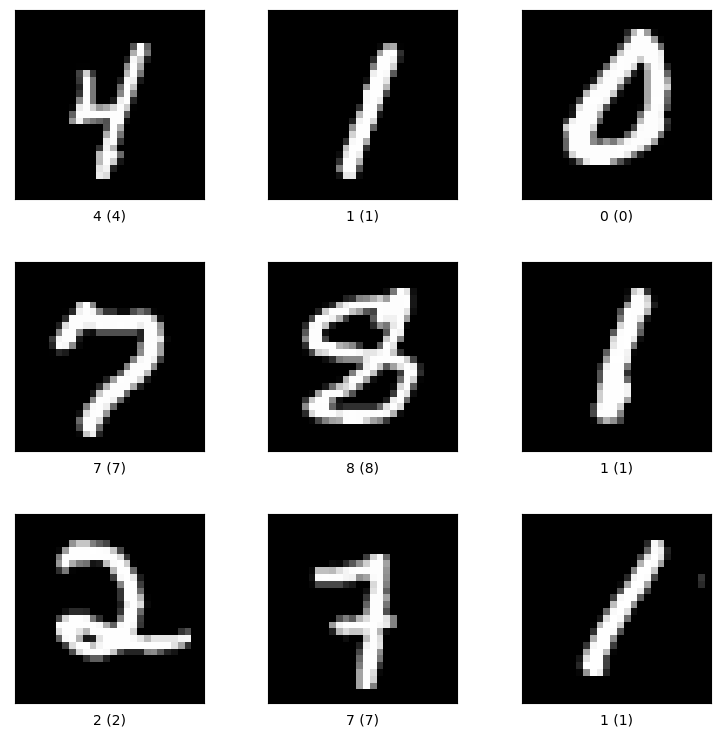

In [3]:
import matplotlib.pyplot as plt

ds, info = tfds.load('mnist', split='train', with_info=True, shuffle_files=True)

fig = tfds.show_examples(ds, info)

In [9]:
# To create a dataset from your own data:

np.random.seed(1)

features = np.random.uniform(0,1, size=(32, 100, 100))
labels = np.random.randint(0, 2, size=(32, 1))

dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(5)  

for epoch in range(2):
    for step, (x_batch, y_batch) in enumerate(dataset):
        print(f'step: {step}, x_batch shape: {x_batch.shape}, y_batch shape: {y_batch.shape}')

    print()
        

step: 0, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 1, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 2, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 3, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 4, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 5, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 6, x_batch shape: (2, 100, 100), y_batch shape: (2, 1)

step: 0, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 1, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 2, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 3, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 4, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 5, x_batch shape: (5, 100, 100), y_batch shape: (5, 1)
step: 6, x_batch shape: (2, 100, 100), y_batch shape: (2, 1)

